<a href="https://colab.research.google.com/github/blancavazquez/CursoDatosMasivosII/blob/master/notebooks/1d_cur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#https://shivankgoel.github.io/notes/ds/cur_decomposition_shivank.pdf
import numpy as np
import random
from numpy.linalg import pinv as inv
import matplotlib.pyplot as plt

def decision(probability):
    return random.random() < probability

def colselect(A, k, row=False, eps=1):
    c = (k * np.log(k)) / (eps*eps)
    m,n=A.shape[0], A.shape[1]
    u,s,vh=np.linalg.svd(A,full_matrices=False)
    vh=vh[:k,:]
    probs=(1/k)*(vh**2).sum(axis=0)
    probs=[min(1,c*p) for p in probs]
    idxs=[decision(p) for p in probs]
    cols=A[:,idxs]
    included_idx=[i for i in range(n) if idxs[i]]
    if row:
        return cols.T, included_idx
    return cols,included_idx

def cur_decompose(A,k,e=1,return_idx=False):
    m,n=A.shape[0],A.shape[1]
    if k>min(m,n):
        return[],[],[]
    C,includedcols=colselect(A,k,False,eps=e)
    R,includedrows=colselect(A.T,k,True,eps=e)
    U=inv(C)@A@inv(R)
    if return_idx:
        return C,U,R,includedcols,includedrows
    return C,U,R

def give_error(A,B):
    return np.sqrt(((A-B)**2).sum())

def give_svd_results(A,upto=10):
    errors=[]
    ks=[i for i in range(1,upto+1)]
    a,b,c=np.linalg.svd(A)
    for k in ks:
        errors.append(give_error(A,a[:,:k]@np.diag(b[:k])@c[:k,:]))
    return errors

def give_cur_vals(A,k,N=10):
    c,u,r,cols,rows=cur_decompose(A,k,return_idx=True)
    err=give_error(A,c@u@r)
    for i in range(N):
        ctmp,utmp,rtmp,ctmp,rtmp=cur_decompose(A,k,return_idx=True)
        errtemp=give_error(A,ctmp@utmp@rtmp)
        if errtemp<err:
            err=errtemp
            c=ctmp
            u=utmp
            r=rtmp
            cols=ctmp
            rows=rtmp
    return c,u,r,err,cols,rows

def give_cur_results(A,upto=10):
    errors=[]
    ks=[i for i in range(1,upto+1)]
    for k in ks:
        a,b,c,err,rows,cols=give_cur_vals(A,k)
        errors.append(err)
    return errors

def plot_cur_and_svd_error(A,upto=10):
    errs1=give_svd_results(A,upto)
    errs2=give_cur_results(A,upto)
    x=[i for i in range(1,upto+1)]
    plt.plot(x,errs1,'b-',label='SVD')
    plt.plot(x,errs2,'r-',label='CUR')
    plt.xlabel("Value_of_k")
    plt.ylabel("Reconstruction_Error:_Forbenius_Norm")
    plt.title("CUR_vs_SVD_Reconstruction_Error")
    plt.legend(loc='best')
    plt.show()

In [3]:
def getdata():
    file=open('/content/drive/MyDrive/Colab Notebooks/images/u.data','r')
    usermovies=np.zeros((943,1682))
    entries=[[int(t)for t in k.split('\t')]for k in file.readlines()]
    for e in entries:
        usermovies[e[0]-1,e[1]-1]=e[2]
    print("usermovies::",usermovies.shape)
    print("usermovies::\n",usermovies)
    return usermovies

usermovies=getdata()

usermovies:: (943, 1682)
usermovies::
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


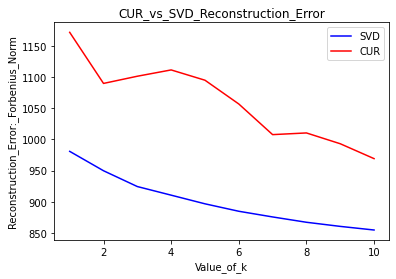

In [4]:
plot_cur_and_svd_error(usermovies,upto=10)